# Apply your skills
## Instructions
So far, you have worked with the Minnesota birds dataset to discover information about bird quantities and population density. Practice your application of these techniques by trying a different dataset, perhaps sourced from Kaggle. Build a notebook to tell a story about this dataset, and make sure to use histograms when discussing it.

Visualize the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('C:/Users/User.MADSCIENTIST/DS-MachineLearning/3-Data-Visualization/05-visualization-quantities/birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


Show a histogram of the Max Body Mass data

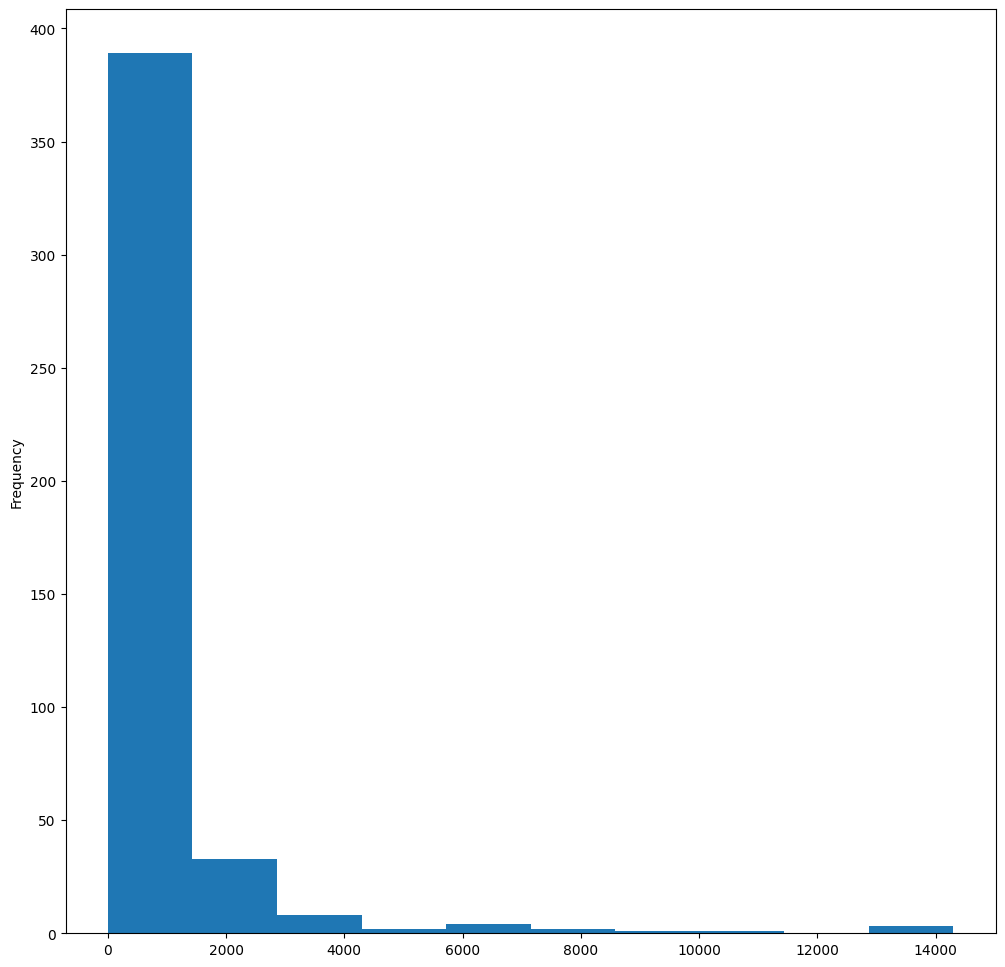

In [4]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 10,figsize = (12,12))
plt.show()

Experiment with bins

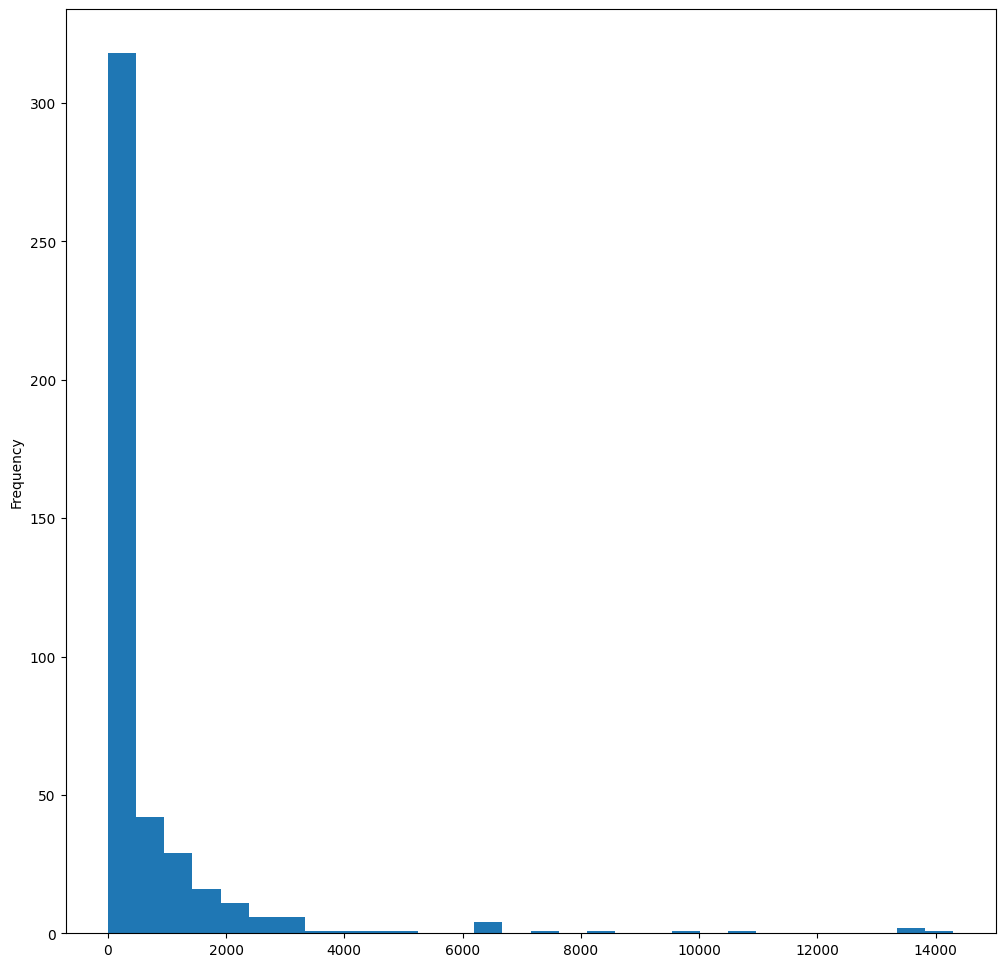

In [5]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 30,figsize = (12,12))
plt.show()

Filter the data and create a new histogram

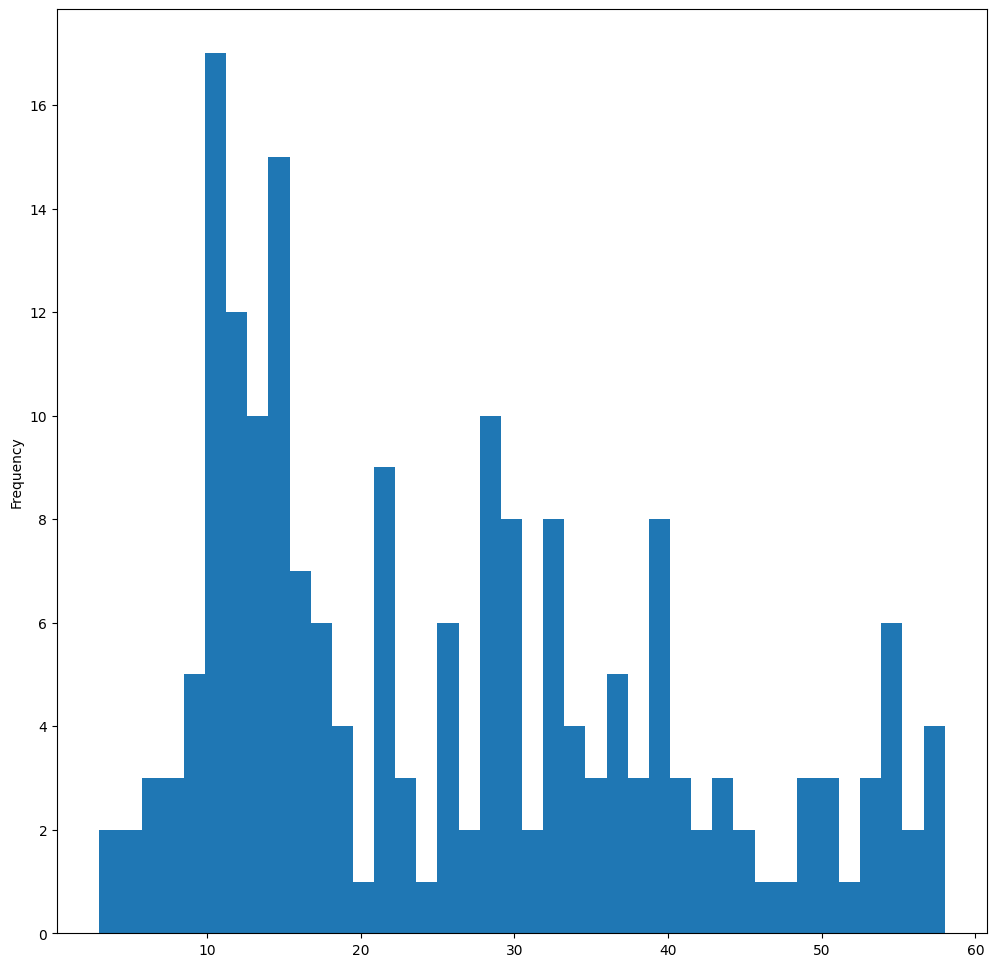

In [6]:

filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()

Create a 2D histgram showing the relationship between MaxBodyMass and MaxLength

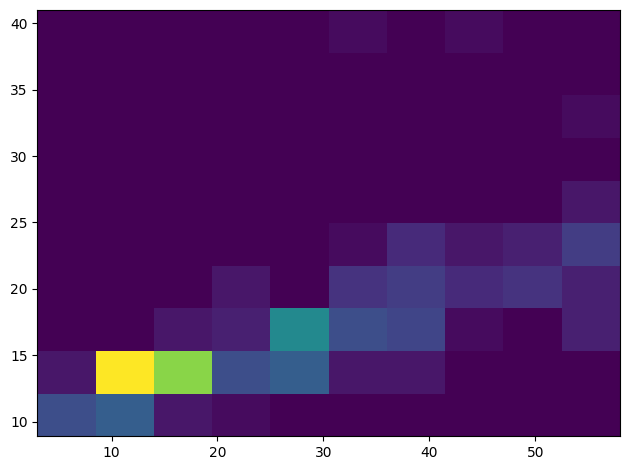

In [7]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

Working with the filtered dataset, create a labelled and stacked histogram superimposing ConservationStatus with MaxBodyMass

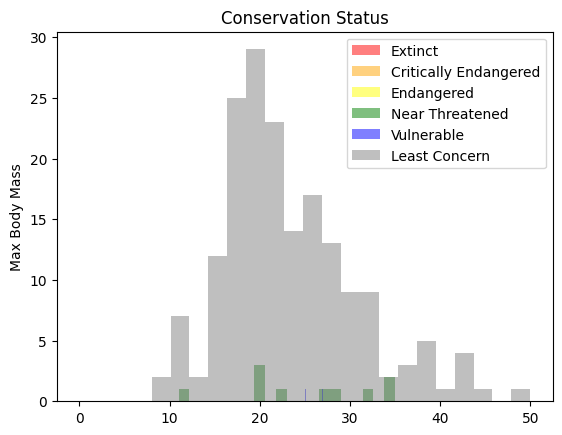

In [8]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Max Body Mass')
plt.legend();

Working with Seaborn, create a smooth plot about MinWingspan

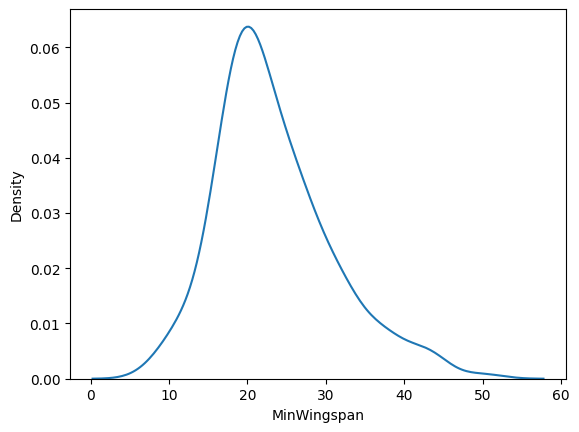

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

There doesn't seem to be a good correlation between maximum wingspan and Order

### Density plots
Noticed that the histograms you have looked at so far are 'stepped' and do not flow smoothly in an arc. To show a smoother density chart, we can try a density plot(KDE plot). Let have a look at the minimum body mass(g) of birds from filtered_df using kde plot.

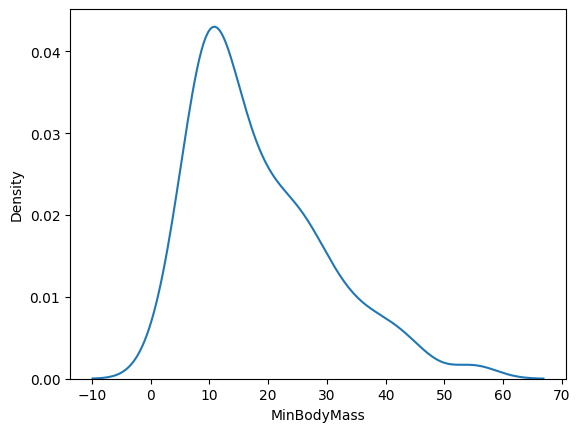

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinBodyMass'])
plt.show()

You can see how the plot mimic the previous one for Minimum Body Mass data; it's just a bit smoother. This KDE produces a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.

Let make the kde plot smooth at the same time not to smooth using bw_adjust parameter

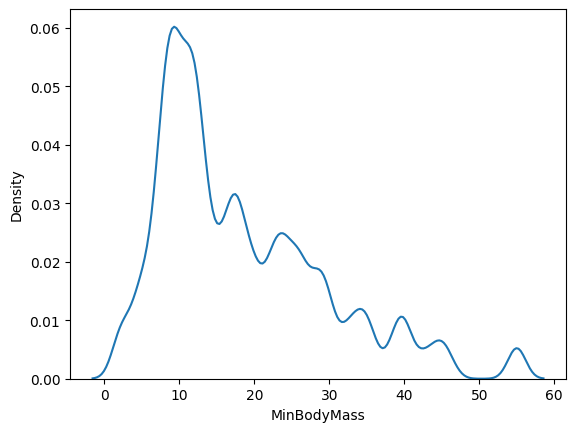

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinBodyMass'],bw_adjust=0.3)
plt.show()

To use additional layer of date point in the kde plot, we use the hue and palette parameter to add colors

C:\Users\User.MADSCIENTIST\AppData\Local\Temp\ipykernel_25320\104786667.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


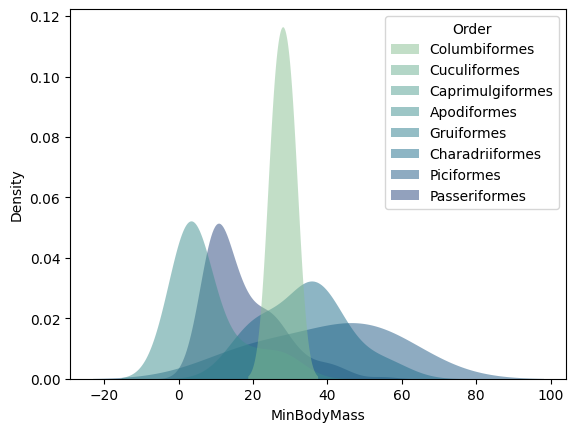

In [13]:
sns.kdeplot(
   data=filteredBirds, x="MinBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

We can also map the density of several variables in one chart. Text the MaxBodyMass and MinBodyMass of a bird compared to their Order:

C:\Users\User.MADSCIENTIST\AppData\Local\Temp\ipykernel_25320\3983948228.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinBodyMass", y="MaxBodyMass", hue="Order")
C:\Users\User.MADSCIENTIST\AppData\Local\Temp\ipykernel_25320\3983948228.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinBodyMass", y="MaxBodyMass", hue="Order")
C:\Users\User.MADSCIENTIST\AppData\Local\Temp\ipykernel_25320\3983948228.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinBodyMass", y="MaxBodyMass", hue="Order")
C:\Users\User.MADSCIENTIST\AppData\Local\Temp\ipykernel_25320\3983948228.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covari

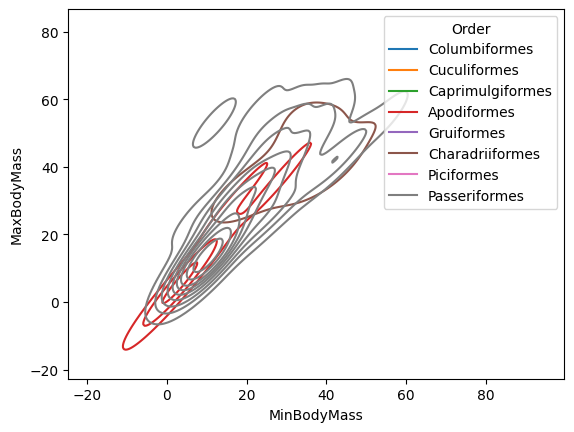

In [14]:
sns.kdeplot(data=filteredBirds, x="MinBodyMass", y="MaxBodyMass", hue="Order")
plt.show()